In [1]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import random

In [2]:
path_x_test = 'data/X_test.csv'

X_test = pd.read_csv(path_x_test, index_col=0)
# X_test

In [3]:
path_x_train = 'data/X_train.csv'

X_train = pd.read_csv(path_x_train, index_col=0)
X_train.head()

,acc_now_delinq,addr_state,annual_inc,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,dti,earliest_cr_line,emp_length,fico_range_high,...,pub_rec,pub_rec_bankruptcies,purpose,revol_util,tax_liens,term,title,total_acc,verification_status,zip_code
index,,,,,,,,,,,,,,,,,,,,,
0,0.0,UT,80000.0,0.0,0.0,0.0,30.49,Oct-1996,4 years,689.0,...,1.0,1.0,credit_card,56.1%,0.0,36 months,Credit card refinancing,26.0,Source Verified,847xx
1,0.0,CA,82000.0,0.0,0.0,0.0,7.00,Mar-1993,10+ years,689.0,...,1.0,1.0,credit_card,88.3%,0.0,36 months,Credit card refinancing,11.0,Not Verified,900xx
2,0.0,NV,46080.0,0.0,0.0,1.0,17.32,Nov-2000,3 years,674.0,...,0.0,0.0,credit_card,18.1%,0.0,36 months,Credit card refinancing,31.0,Source Verified,895xx
3,0.0,AZ,30000.0,0.0,0.0,0.0,7.80,Jan-2010,< 1 year,694.0,...,0.0,0.0,car,33.4%,0.0,36 months,Car financing,24.0,Source Verified,853xx
4,0.0,OH,70000.0,0.0,0.0,0.0,13.36,Jan-2002,< 1 year,674.0,...,0.0,0.0,other,88.6%,0.0,60 months,Other,16.0,Not Verified,453xx


In [4]:
path_y_train = 'data/y_train.csv'

y_train = pd.read_csv(path_y_train, index_col=0)
y_train.head()

,loan_status
index,
0,1
1,0
2,1
3,0
4,0


### EDA

In [5]:
# распределение классов
y_train.value_counts()/y_train.value_counts().sum()

loan_status
0              0.806971
1              0.193029
dtype: float64

In [6]:
# кол-во уникальных типов в столбцах
X_train.dtypes.value_counts()

float64    32
object     12
dtype: int64

<Axes: >

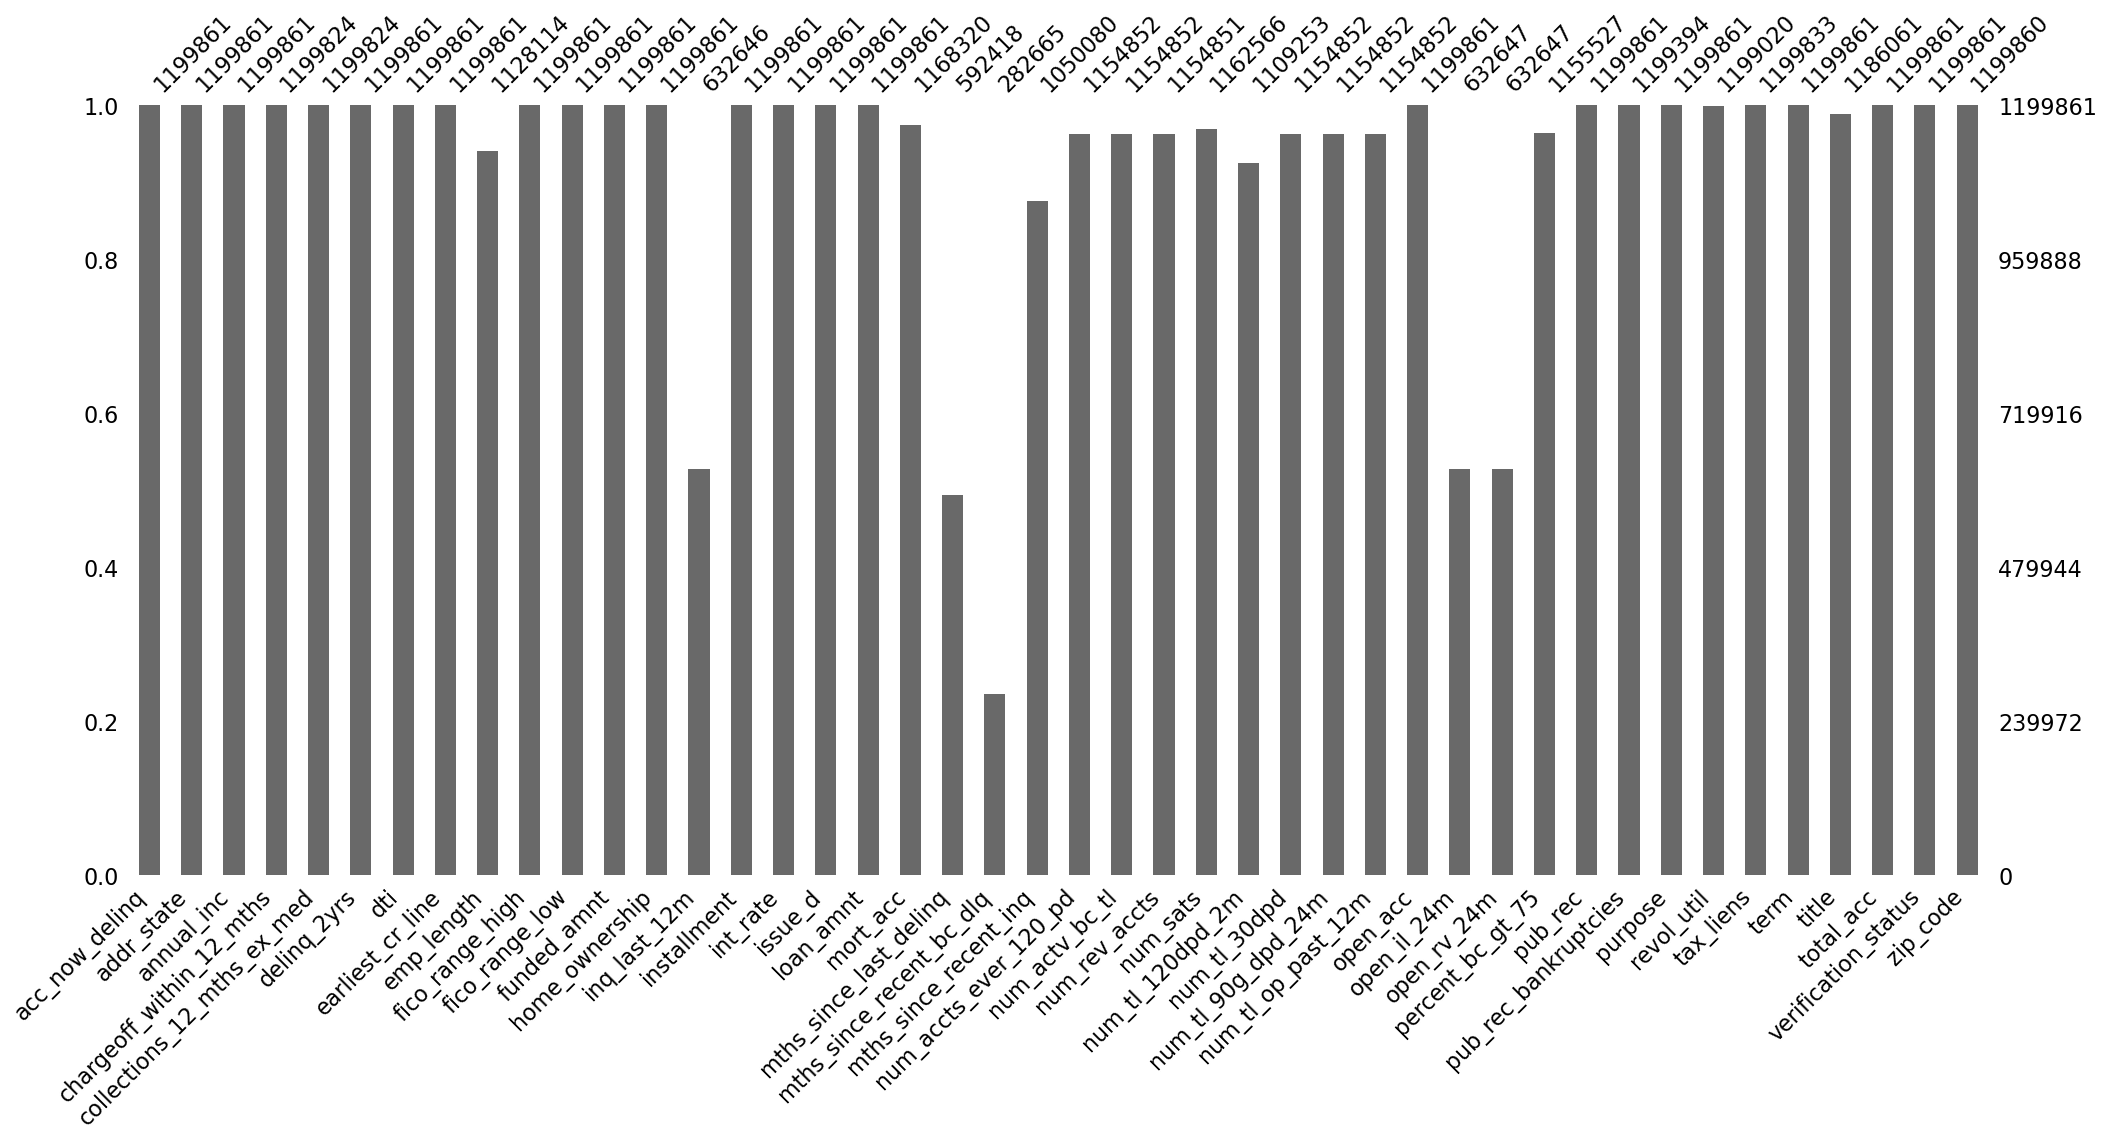

In [7]:
import missingno as msno

msno.bar(X_train)

#### 1. Type Object

<Axes: >

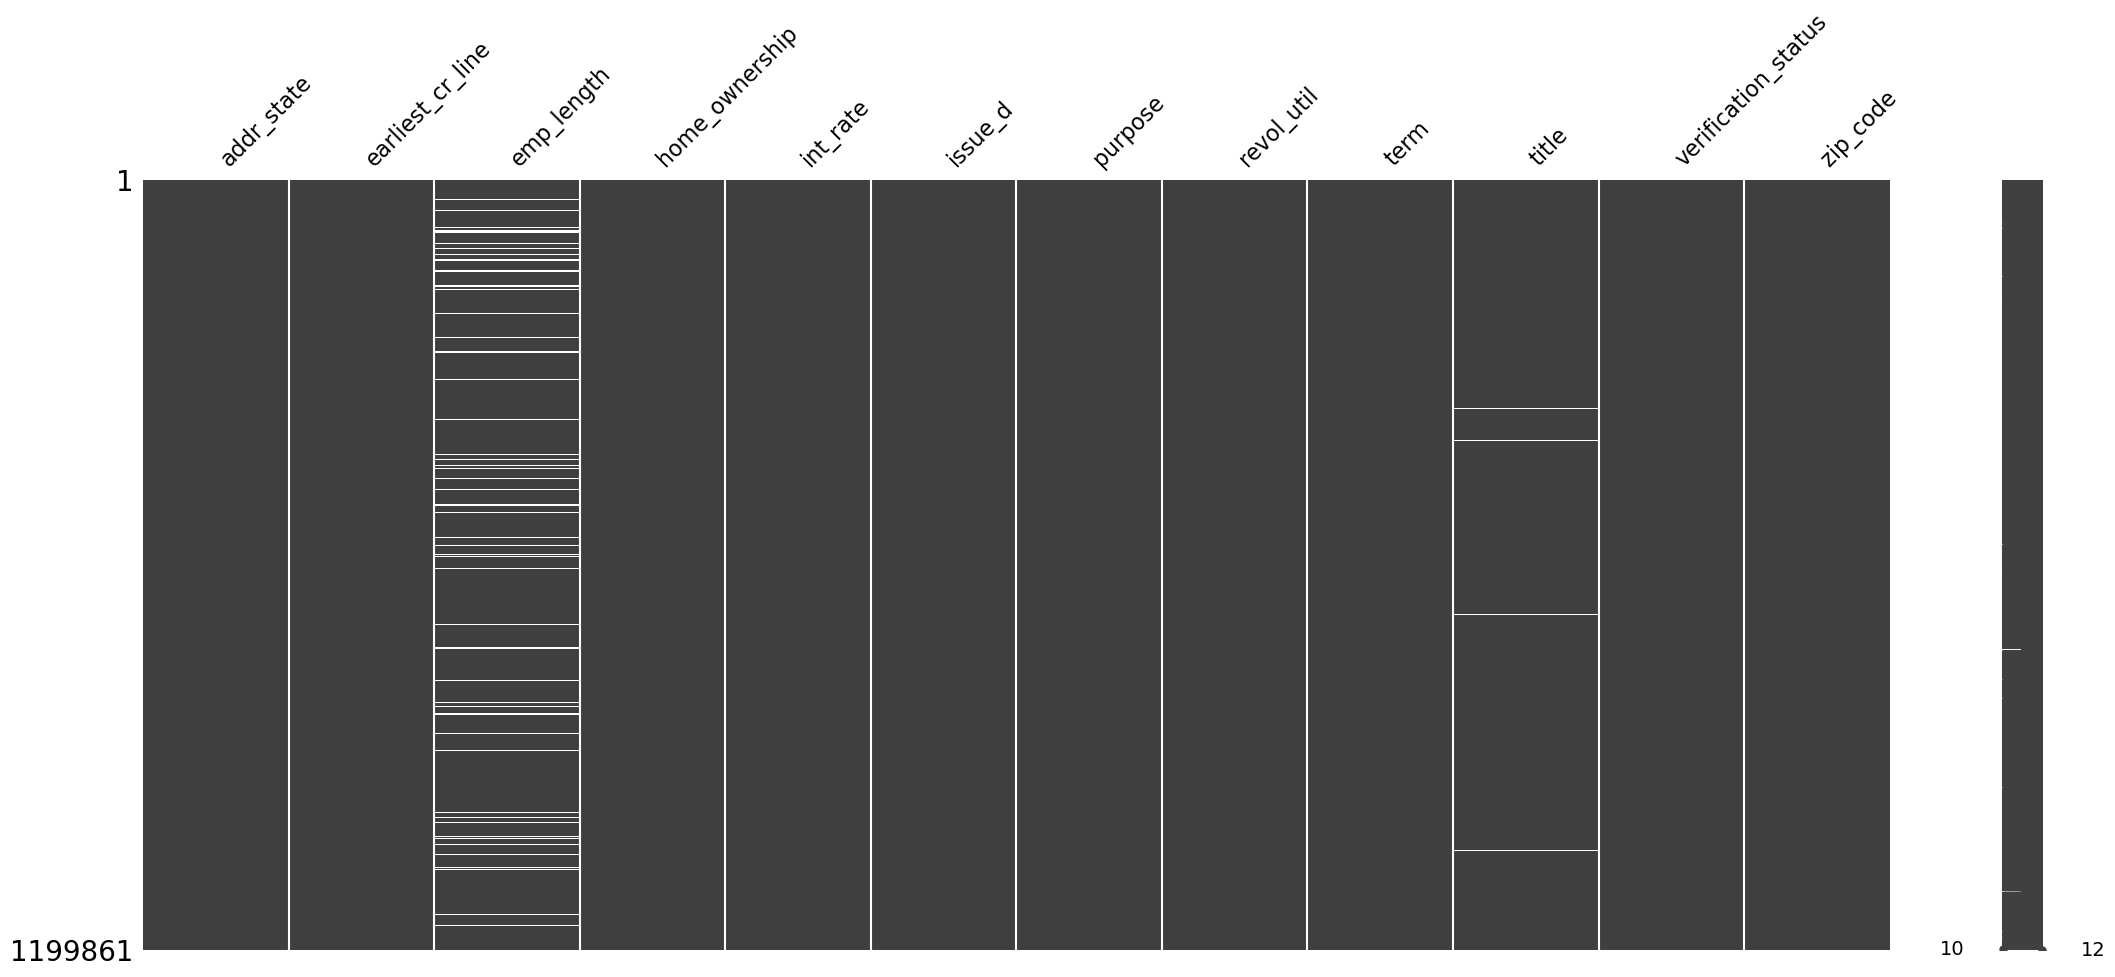

In [8]:
msno.matrix(X_train.select_dtypes(include=object))

In [9]:
# матрица корреляции пропущенных значений для object
df = X_train.select_dtypes(include='object').iloc[:, [i for i, n in enumerate(np.var(X_train.select_dtypes(include='object').isnull(), axis = 'rows')) if n > 0]]
df.isnull().corr()

,emp_length,revol_util,title,zip_code
emp_length,1.000000,-0.000304,0.038366,-0.000230
revol_util,-0.000304,1.000000,-0.000789,-0.000024
title,0.038366,-0.000789,1.000000,-0.000098
zip_code,-0.000230,-0.000024,-0.000098,1.000000


<Axes: >

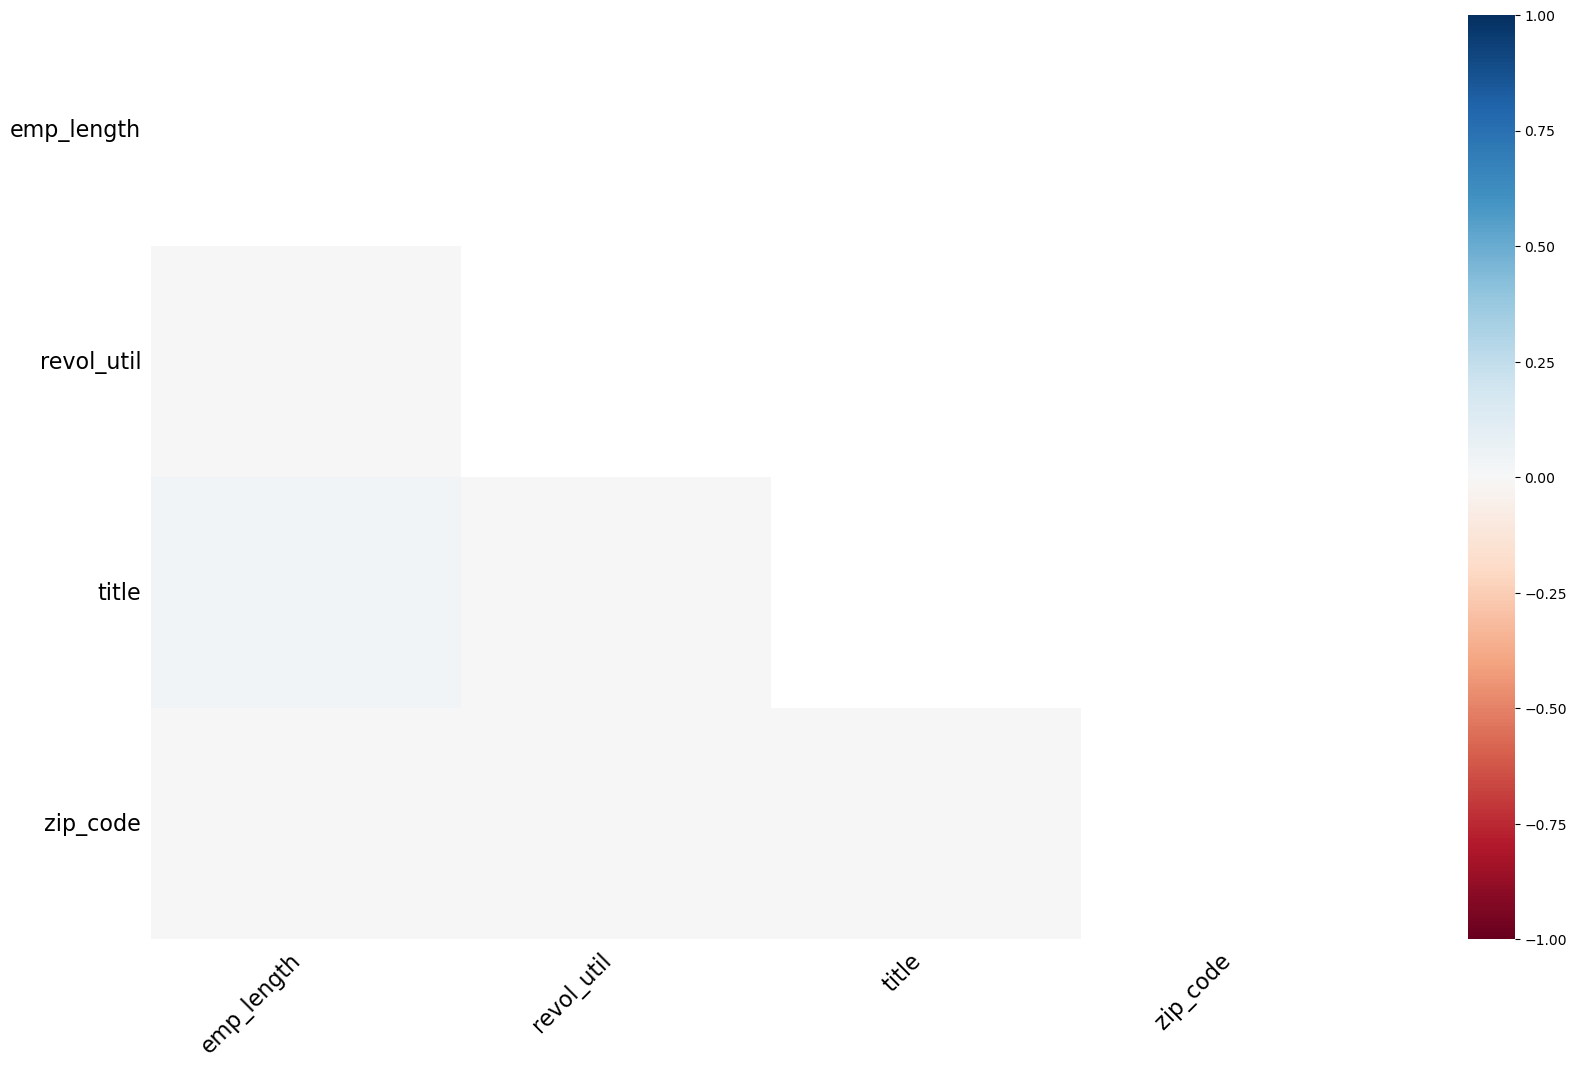

In [10]:
msno.heatmap(X_train.select_dtypes(include='object'))

Вывод: Пропуски одного признака не влияют на пропуски другого.

In [11]:
# кол-во Nan type object
print('Кол-во nan всего: ', X_train.select_dtypes(include='object').isnull().sum().sum())
X_train.select_dtypes(include='object').isnull().sum()

Кол-во nan всего:  86389


addr_state                 0
earliest_cr_line           0
emp_length             71747
home_ownership             0
int_rate                   0
issue_d                    0
purpose                    0
revol_util               841
term                       0
title                  13800
verification_status        0
zip_code                   1
dtype: int64

In [12]:
# test data
print('Кол-во nan всего: ', X_test.select_dtypes(include='object').isnull().sum().sum())
X_test.select_dtypes(include='object').isnull().sum()

Кол-во nan всего:  42887


addr_state                 0
earliest_cr_line           0
emp_length             35630
home_ownership             0
int_rate                   0
issue_d                    0
purpose                    0
revol_util               413
term                       0
title                   6844
verification_status        0
zip_code                   0
dtype: int64

In [13]:
X_train.select_dtypes(include='object').head()

,addr_state,earliest_cr_line,emp_length,home_ownership,int_rate,issue_d,purpose,revol_util,term,title,verification_status,zip_code
index,,,,,,,,,,,,
0,UT,Oct-1996,4 years,RENT,12.99%,Apr-2016,credit_card,56.1%,36 months,Credit card refinancing,Source Verified,847xx
1,CA,Mar-1993,10+ years,MORTGAGE,10.42%,Sep-2017,credit_card,88.3%,36 months,Credit card refinancing,Not Verified,900xx
2,NV,Nov-2000,3 years,MORTGAGE,8.99%,Aug-2016,credit_card,18.1%,36 months,Credit card refinancing,Source Verified,895xx
3,AZ,Jan-2010,< 1 year,OWN,11.53%,Aug-2015,car,33.4%,36 months,Car financing,Source Verified,853xx
4,OH,Jan-2002,< 1 year,RENT,26.30%,Sep-2017,other,88.6%,60 months,Other,Not Verified,453xx


In [14]:
# Кол-во уникальных эл-ов
X_train.select_dtypes(include='object').nunique()

addr_state                51
earliest_cr_line         748
emp_length                11
home_ownership             6
int_rate                 669
issue_d                  160
purpose                   14
revol_util              1316
term                       2
title                  43858
verification_status        3
zip_code                 936
dtype: int64

In [15]:
X_train.join(y_train)[['zip_code', 'loan_status']].groupby(['zip_code']).mean().head()

,loan_status
zip_code,
007xx,0.333333
008xx,0.200000
009xx,0.000000
010xx,0.206841
011xx,0.242792


Text(0, 0.5, 'Кол-во такой доли')

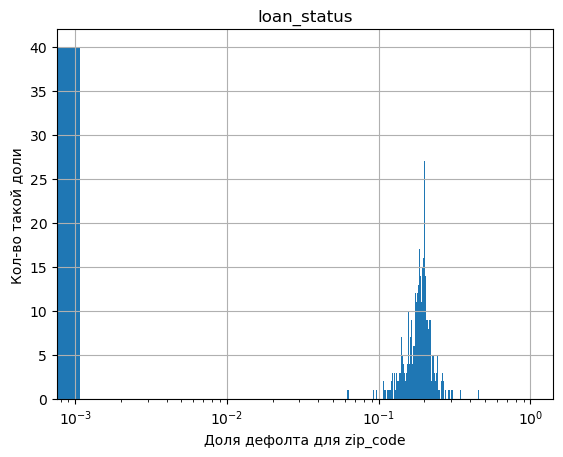

In [16]:
X_train.join(y_train)[['zip_code', 'loan_status']].groupby(['zip_code']).mean().hist(bins=936)
plt.xscale('log')   # для отображения нулевой доли дефолта
plt.xlabel('Доля дефолта для zip_code')
plt.ylabel('Кол-во такой доли')

In [17]:
X_train.join(y_train)[['addr_state', 'loan_status']].groupby(['addr_state']).mean().head()

,loan_status
addr_state,
AK,0.178810
AL,0.223659
AR,0.236224
AZ,0.187814
CA,0.192979


Text(0, 0.5, 'Кол-во такой доли')

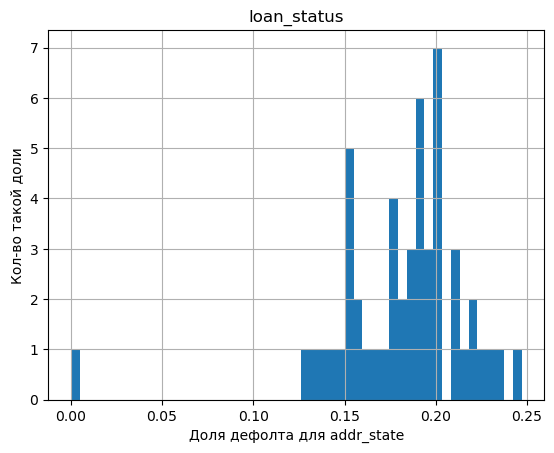

In [18]:
X_train.join(y_train)[['addr_state', 'loan_status']].groupby(['addr_state']).mean().hist(bins=51)

plt.xlabel('Доля дефолта для addr_state')
plt.ylabel('Кол-во такой доли')

In [19]:
# sorting categorical features
cat_one_hot_features = ['addr_state', 'home_ownership', 'purpose', 'verification_status']
cat_label_encode_features = ['term', 'emp_length']
cat_date_features = ['earliest_cr_line', 'issue_d']
cat_numerical_features = ['int_rate', 'revol_util']
cat_questionable_features = ['title', 'zip_code']

Cat preprocess

In [20]:
# fillna cat features
def fillna_cat_features(dff, emp_length_mode=1):
    df = dff.copy()
    del dff
    # 1. fill emp_length column
    # fill zeros
    if emp_length_mode == 0:
        df.emp_length = df.emp_length.fillna(0)
    # fill random
    elif emp_length_mode == 1:
        mask = df.emp_length.isnull()
        samples = random.choices(df.emp_length[~mask].values , k=mask.sum())
        df.emp_length[mask] = samples
    # fill most popular
    elif emp_length_mode == 2:
        df.emp_length = df.emp_length.fillna(df.emp_length.value_counts().index[0])
        
    # 2. fill title column
    # fill unknown
    df.title = df.title.fillna('unknown')

    # 3. fill other columns by 0
    df[df.select_dtypes(include='object').columns] = df.select_dtypes(include='object').fillna('0')
    
    return df


# numeric features
def preprocess_num_features(dff, cat_numerical_features):
    df = dff.copy()
    del dff
    # convert cat feature to numeric
    for num_column in cat_numerical_features:
        df[num_column] = df[num_column].str.replace('%', '').astype(float)  # X_train[num].str.extract(r'(\d+.\d+)')
    
    return df
        

# cyclic features for date
def encode(data, col, max_val):
    data[f'{col}_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[f'{col}_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data.iloc[:, -3:]    # return 3 last columns (year, sin, cos)


# date features
def preprocess_date_features(df, cat_date_features):
    # convert dict for month
    month_dict = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 
                  'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
    for date_column in cat_date_features:
        date_df = df[date_column].str.extract(r'(\w{3})-(\d{4})')
        # month to int
        date_df[0] = date_df[0].map(month_dict)
        # rename columns 0, 1
        date_df = date_df.rename(columns={0: f'{date_column}_month', 1: f'{date_column}_year'}).astype(np.float64)
        # month to cyclic
        date_df_cyclic = encode(date_df, f'{date_column}_month', 12)
        
        df = df.join(date_df_cyclic)
    df = df.drop(columns=cat_date_features)

    return df


# convert object types to category
# X_train[X_train.select_dtypes(object).columns] = X_train.select_dtypes(object).astype('category')


In [21]:
preprocess_date_features(X_train, cat_date_features).dtypes.value_counts()

float64    38
object     10
dtype: int64

In [22]:
X_train.dtypes.value_counts()

float64    32
object     12
dtype: int64

In [23]:
X_train_precat = X_train.copy()
X_train_precat = fillna_cat_features(X_train_precat)
X_train_precat = preprocess_num_features(X_train_precat, cat_numerical_features)
X_train_precat = preprocess_date_features(X_train_precat, cat_date_features)

C:\Users\zekat\AppData\Local\Temp\ipykernel_864\360069558.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.emp_length[mask] = samples


In [24]:
X_train_precat.dtypes.value_counts()

float64    40
object      8
dtype: int64

In [25]:
X_train_precat.select_dtypes(object).head()

,addr_state,emp_length,home_ownership,purpose,term,title,verification_status,zip_code
index,,,,,,,,
0,UT,4 years,RENT,credit_card,36 months,Credit card refinancing,Source Verified,847xx
1,CA,10+ years,MORTGAGE,credit_card,36 months,Credit card refinancing,Not Verified,900xx
2,NV,3 years,MORTGAGE,credit_card,36 months,Credit card refinancing,Source Verified,895xx
3,AZ,< 1 year,OWN,car,36 months,Car financing,Source Verified,853xx
4,OH,< 1 year,RENT,other,60 months,Other,Not Verified,453xx


#### 2. Type float64

<Axes: >

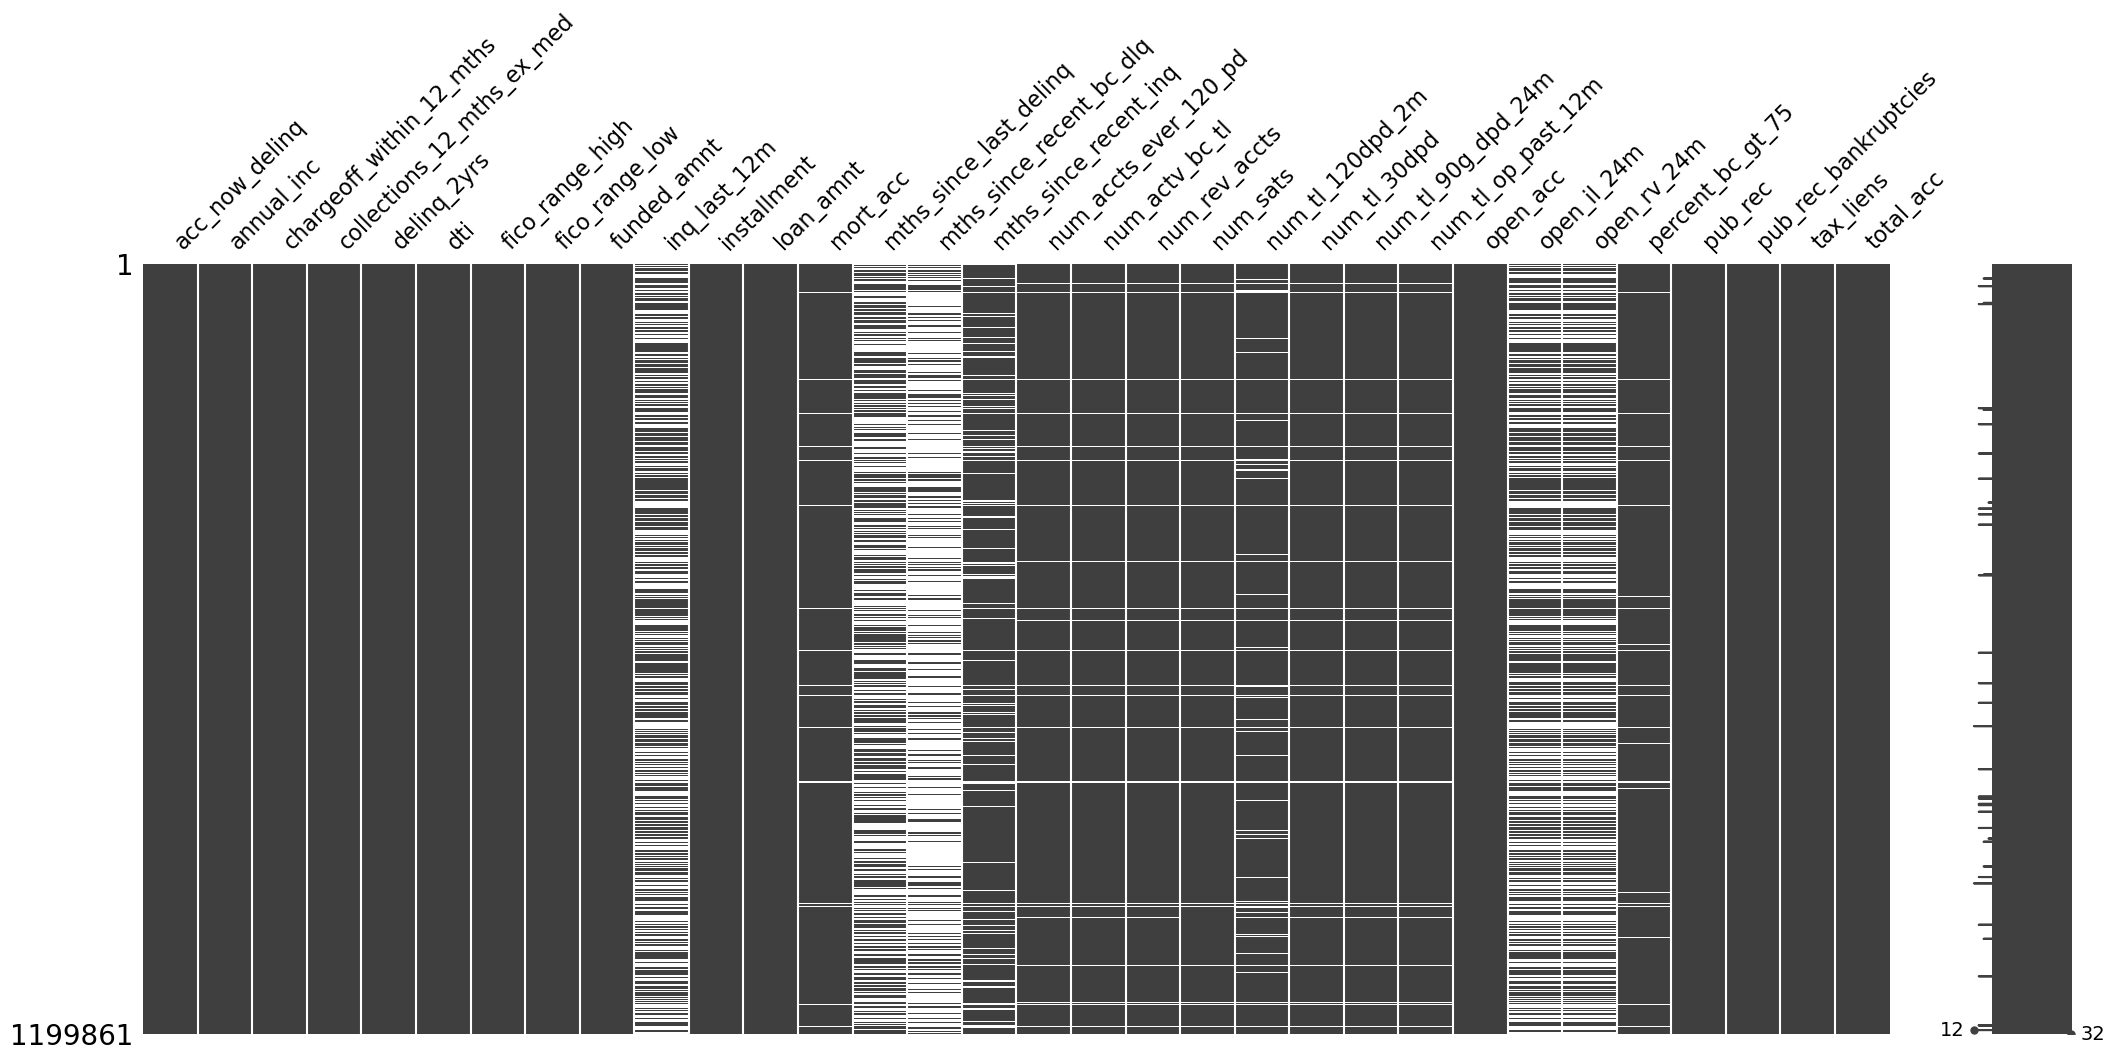

In [26]:
msno.matrix(X_train.select_dtypes(include=float))

<Axes: >

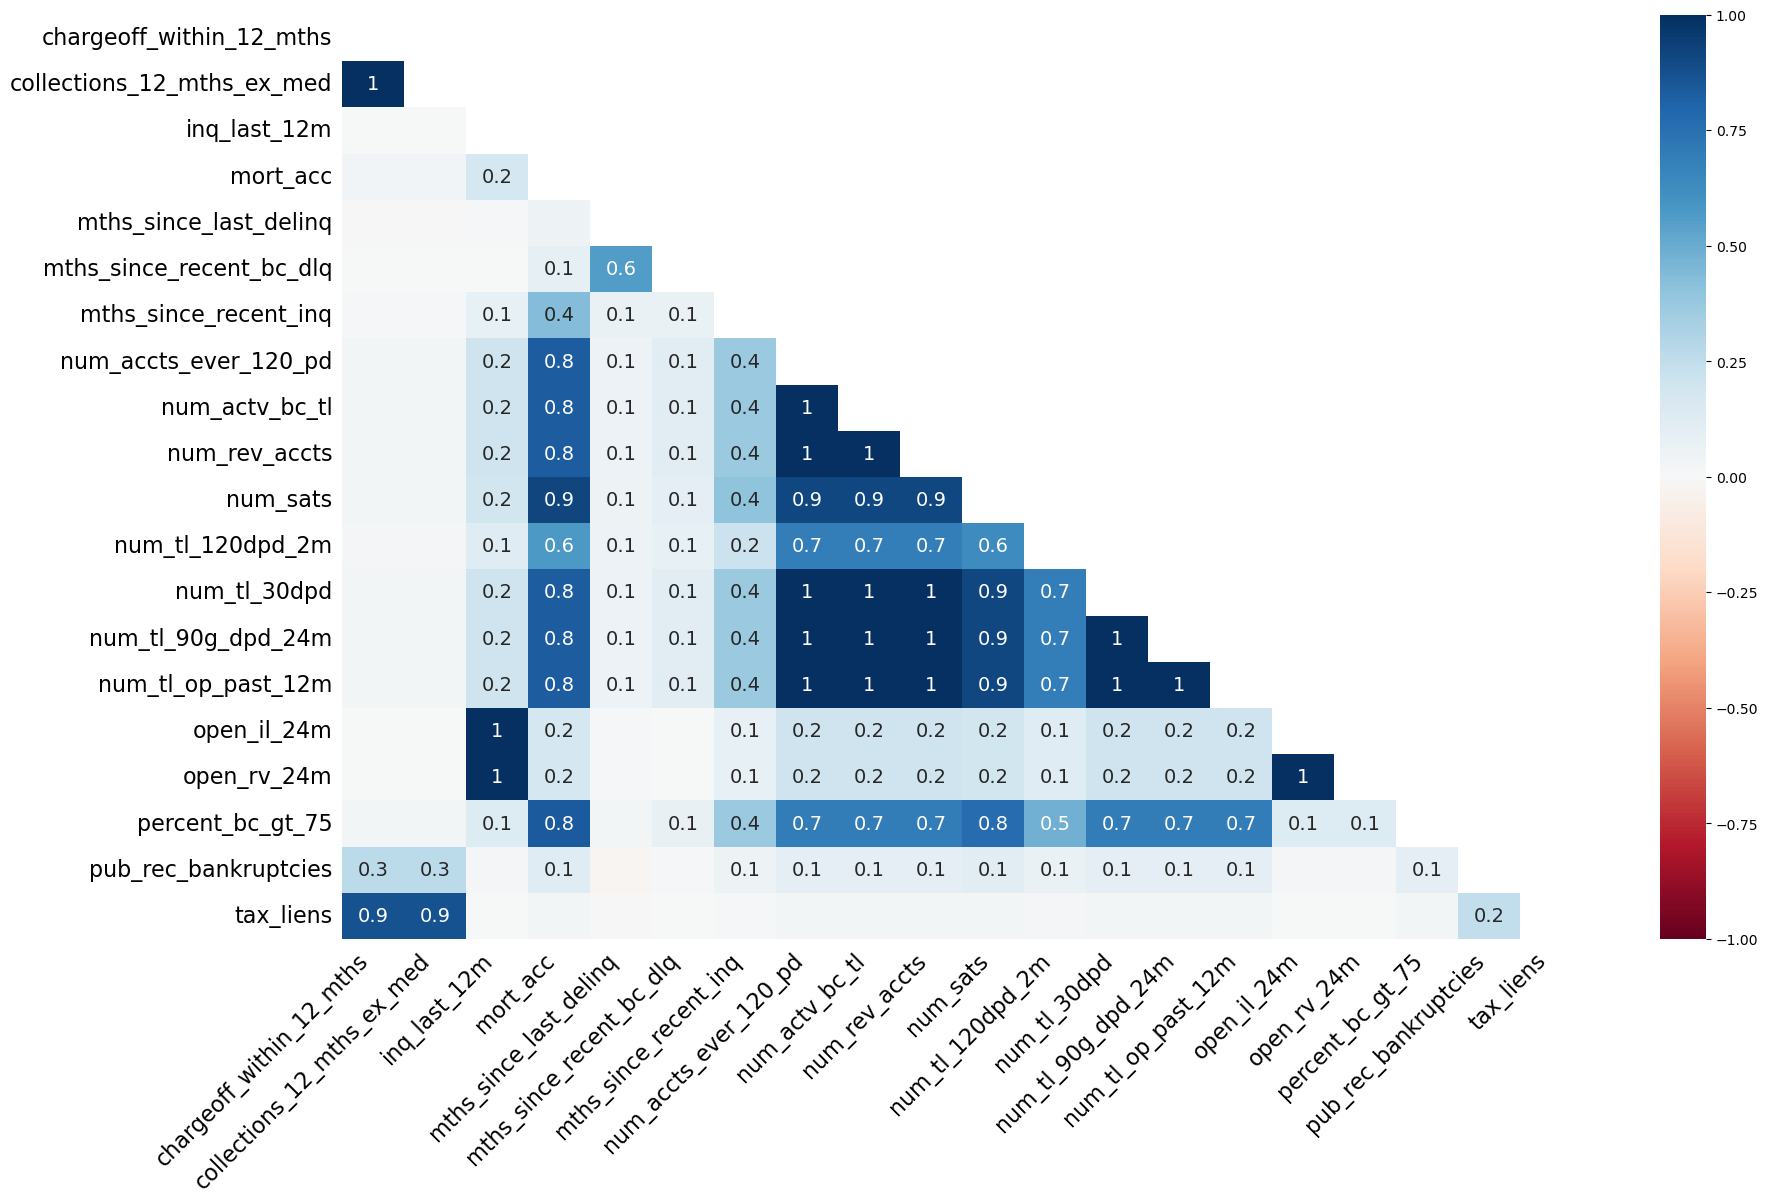

In [27]:
msno.heatmap(X_train.select_dtypes(include=float))

Вывод: Пропуски одного признака влияют на пропуски другого.

In [28]:
# кол-во Nan type float64
print('Кол-во nan всего: ', X_train.select_dtypes(include='float64').isnull().sum().sum())
show_float_df = pd.DataFrame(X_train.select_dtypes(include='float64').isnull().mean(), columns=['Доля NaN'])
show_float_df['Кол-во уникальных значений'] = X_train.select_dtypes(include='float64').nunique().values
show_float_df

Кол-во nan всего:  3850465


,Доля NaN,Кол-во уникальных значений
acc_now_delinq,0.000000,7
annual_inc,0.000000,59051
chargeoff_within_12_mths,0.000031,11
collections_12_mths_ex_med,0.000031,13
delinq_2yrs,0.000000,32
dti,0.000000,4747
fico_range_high,0.000000,38
fico_range_low,0.000000,38
funded_amnt,0.000000,1562
inq_last_12m,0.472734,45


In [29]:
# corr with tagret
pd.DataFrame(X_train.join(y_train.astype(float)).select_dtypes(float).corr().loan_status)

,loan_status
acc_now_delinq,0.001267
annual_inc,-0.018018
chargeoff_within_12_mths,0.002800
collections_12_mths_ex_med,0.015012
delinq_2yrs,0.014264
dti,0.088020
fico_range_high,-0.123212
fico_range_low,-0.123214
funded_amnt,0.069562
inq_last_12m,0.065002


Необходимо заполнить пропуски многомерным методом. Пока что отбросим знание категориальных признаков. Будем заполнять пропущенные фичи float, используя знания заполненных фич float. Будем заполнять при помощи метода MICE (Multiple Imputation by Chained Equations, многомерный способ заполнения пропущенных данных с помощью цепных уравнений)

In [30]:
# выбор фич без пропусков
X_train_precat.select_dtypes(float).head()

,acc_now_delinq,annual_inc,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,dti,fico_range_high,fico_range_low,funded_amnt,inq_last_12m,...,pub_rec_bankruptcies,revol_util,tax_liens,total_acc,earliest_cr_line_year,earliest_cr_line_month_sin,earliest_cr_line_month_cos,issue_d_year,issue_d_month_sin,issue_d_month_cos
index,,,,,,,,,,,,,,,,,,,,,
0,0.0,80000.0,0.0,0.0,0.0,30.49,689.0,685.0,16000.0,1.0,...,1.0,56.1,0.0,26.0,1996.0,-0.866025,5.000000e-01,2016.0,0.866025,-5.000000e-01
1,0.0,82000.0,0.0,0.0,0.0,7.00,689.0,685.0,6600.0,0.0,...,1.0,88.3,0.0,11.0,1993.0,1.000000,6.123234e-17,2017.0,-1.000000,-1.836970e-16
2,0.0,46080.0,0.0,0.0,1.0,17.32,674.0,670.0,10000.0,0.0,...,0.0,18.1,0.0,31.0,2000.0,-0.500000,8.660254e-01,2016.0,-0.866025,-5.000000e-01
3,0.0,30000.0,0.0,0.0,0.0,7.80,694.0,690.0,3000.0,NaN,...,0.0,33.4,0.0,24.0,2010.0,0.500000,8.660254e-01,2015.0,-0.866025,-5.000000e-01
4,0.0,70000.0,0.0,0.0,0.0,13.36,674.0,670.0,20000.0,0.0,...,0.0,88.6,0.0,16.0,2002.0,0.500000,8.660254e-01,2017.0,-1.000000,-1.836970e-16


In [31]:
# выбираем фичи без пропусков и с пропусками
float_notna_features = X_train_precat.select_dtypes(float).columns[(X_train_precat.select_dtypes(float).isna().sum() == 0).values].values
float_na_features = X_train_precat.select_dtypes(float).columns[(X_train_precat.select_dtypes(float).isna().sum() != 0).values].values

In [32]:
float_notna_features

array(['acc_now_delinq', 'annual_inc', 'delinq_2yrs', 'dti',
       'fico_range_high', 'fico_range_low', 'funded_amnt', 'installment',
       'int_rate', 'loan_amnt', 'open_acc', 'pub_rec', 'revol_util',
       'total_acc', 'earliest_cr_line_year', 'earliest_cr_line_month_sin',
       'earliest_cr_line_month_cos', 'issue_d_year', 'issue_d_month_sin',
       'issue_d_month_cos'], dtype=object)

In [33]:
# включаем класс IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# модели, которые можем использовать для предсказания пропущенных значений
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor

In [34]:
# mice = X_train_precat.select_dtypes(float).copy()

In [35]:
# scaler = StandardScaler()
 
# # стандартизируем данные и сразу поместим их в датафрейм
# mice = pd.DataFrame(scaler.fit_transform(mice), columns = mice.columns)

In [36]:
# mice.isna().sum()

In [37]:
# mice

In [92]:
# for catboost
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer


tr_fillna_cat_features = FunctionTransformer(fillna_cat_features, kw_args={'emp_length_mode': 2})
tr_preprocess_num_features = FunctionTransformer(preprocess_num_features, kw_args={'cat_numerical_features': cat_numerical_features})
tr_preprocess_date_features = FunctionTransformer(preprocess_date_features, kw_args={'cat_date_features': cat_date_features})

numeric_transformer = Pipeline([('std_scalar', StandardScaler()),
                                ('inputer', IterativeImputer(initial_strategy = 'mean', estimator = LinearRegression(n_jobs=-1),
                                                              max_iter=1, min_value=0., random_state=0, verbose=2))
                                ])

preprocessor = Pipeline([('tr_fillna_cat_features', tr_fillna_cat_features),
                         ('tr_preprocess_num_features', tr_preprocess_num_features),
                         ('tr_preprocess_date_features', tr_preprocess_date_features),
                         ('num_preprocess', ColumnTransformer([('num', numeric_transformer, selector(dtype_exclude='object')),
                                                               ('cat', FunctionTransformer(lambda df: df), selector(dtype_include='object'))
                                                               ]))
                         ])

In [38]:
# for nn
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, TargetEncoder


def make_regx_selector(lst):
    ans = ''
    for el in lst:
        if el == lst[-1]:
            ans += el
        else:
            ans += el + '|'
    return ans


tr_fillna_cat_features = FunctionTransformer(fillna_cat_features, kw_args={'emp_length_mode': 2})
tr_preprocess_num_features = FunctionTransformer(preprocess_num_features, kw_args={'cat_numerical_features': cat_numerical_features})
tr_preprocess_date_features = FunctionTransformer(preprocess_date_features, kw_args={'cat_date_features': cat_date_features})

numeric_transformer = Pipeline([('std_scalar', StandardScaler()),
                                ('inputer', IterativeImputer(initial_strategy = 'mean', estimator = LinearRegression(n_jobs=-1),
                                                              max_iter=20, random_state=0, verbose=2))    # min_value=0.
                               ])

cat_transformer = ColumnTransformer([('onehot', OneHotEncoder(handle_unknown='ignore'),
                                      selector(make_regx_selector(cat_one_hot_features))),
                                     ('label', TargetEncoder(),
                                      selector(make_regx_selector(cat_label_encode_features+cat_questionable_features)))
                                    ])

num_cat_transformer = ColumnTransformer([('num', numeric_transformer, selector(dtype_exclude='object')),
                                         ('cat', cat_transformer, selector(dtype_include='object'))
                                        ])

preprocessor = Pipeline([('tr_fillna_cat_features', tr_fillna_cat_features),
                         ('tr_preprocess_num_features', tr_preprocess_num_features),
                         ('tr_preprocess_date_features', tr_preprocess_date_features),
                         ('num_preprocess', num_cat_transformer)
                         ])

In [39]:
# num
print('num: ', 32+2+2+4)
print('cat: ', 78)

num:  40
cat:  78


In [40]:
preprocessor

Pipeline(steps=[('tr_fillna_cat_features',
                 FunctionTransformer(func=<function fillna_cat_features at 0x0000023615B9A3A0>,
                                     kw_args={'emp_length_mode': 2})),
                ('tr_preprocess_num_features',
                 FunctionTransformer(func=<function preprocess_num_features at 0x0000023615B9A430>,
                                     kw_args={'cat_numerical_features': ['int_rate',
                                                                         'revol_util']})),
                ('tr_preprocess_date_features...
                                                  ColumnTransformer(transformers=[('onehot',
                                                                                   OneHotEncoder(handle_unknown='ignore'),
                                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x000002360805BAF0>),
                                                                                  ('label',
                                                                                   TargetEncoder(),
                                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x000002362676FE80>)]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002362676FF40>)]))])

In [41]:
X_train_preprocess = preprocessor.fit_transform(X_train, y_train.values.flatten())

[IterativeImputer] Completing matrix with shape (1199861, 40)
[IterativeImputer] Ending imputation round 1/20, elapsed time 61.25
[IterativeImputer] Change: 1302646019.630743, scaled tolerance: 0.8061664440295762 
[IterativeImputer] Ending imputation round 2/20, elapsed time 121.91
[IterativeImputer] Change: 261500077.08486152, scaled tolerance: 0.8061664440295762 
[IterativeImputer] Ending imputation round 3/20, elapsed time 180.87
[IterativeImputer] Change: 294363671.9275669, scaled tolerance: 0.8061664440295762 
[IterativeImputer] Ending imputation round 4/20, elapsed time 241.22
[IterativeImputer] Change: 120295598.22131555, scaled tolerance: 0.8061664440295762 
[IterativeImputer] Ending imputation round 5/20, elapsed time 300.24
[IterativeImputer] Change: 60240313.35652296, scaled tolerance: 0.8061664440295762 
[IterativeImputer] Ending imputation round 6/20, elapsed time 358.41
[IterativeImputer] Change: 43865843.791235, scaled tolerance: 0.8061664440295762 
[IterativeImputer] En

c:\Users\zekat\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [42]:
with open('data/X_train.npy', 'wb') as f:
    np.save(f, X_train_preprocess)

In [43]:
X_test_preprocess = preprocessor.transform(X_test)

[IterativeImputer] Completing matrix with shape (590977, 40)
[IterativeImputer] Ending imputation round 1/20, elapsed time 1.55
[IterativeImputer] Ending imputation round 2/20, elapsed time 3.09
[IterativeImputer] Ending imputation round 3/20, elapsed time 4.64
[IterativeImputer] Ending imputation round 4/20, elapsed time 6.20
[IterativeImputer] Ending imputation round 5/20, elapsed time 7.76
[IterativeImputer] Ending imputation round 6/20, elapsed time 9.29
[IterativeImputer] Ending imputation round 7/20, elapsed time 10.84
[IterativeImputer] Ending imputation round 8/20, elapsed time 12.37
[IterativeImputer] Ending imputation round 9/20, elapsed time 13.88
[IterativeImputer] Ending imputation round 10/20, elapsed time 15.41
[IterativeImputer] Ending imputation round 11/20, elapsed time 16.95
[IterativeImputer] Ending imputation round 12/20, elapsed time 18.53
[IterativeImputer] Ending imputation round 13/20, elapsed time 20.09
[IterativeImputer] Ending imputation round 14/20, elapsed

In [44]:
with open('data/X_test.npy', 'wb') as f:
    np.save(f, X_test_preprocess)

In [70]:
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset
from utils.pipeline import *


X_train_preprocess2, X_valid_preprocess2, y_train_preprocess2, y_valid_preprocess2 =\
      train_test_split(X_train_preprocess, y_train.values, test_size=0.33, random_state=100)

train_dataset = TensorDataset(torch.Tensor(X_train_preprocess2), torch.Tensor(y_train_preprocess2))
valid_dataset = TensorDataset(torch.Tensor(X_valid_preprocess2), torch.Tensor(y_valid_preprocess2))

scheduler = lambda optim: \
    torch.optim.lr_scheduler.ReduceLROnPlateau(optim, patience=5, factor=0.5, verbose=True)

# model = torch.nn.Linear(118, 1)

best_val_loss, best_model = train_eval_loop(model=s_net,
                                            train_dataset=train_dataset,
                                            val_dataset=valid_dataset,
                                            criterion=torch.nn.functional.cross_entropy,
                                            lr=1e-2,
                                            epoch_n=200,
                                            batch_size=32,
                                            l2_reg_alpha=0,
                                            max_batches_per_epoch_train=len(train_dataset),
                                            max_batches_per_epoch_val=len(valid_dataset),
                                            lr_scheduler_ctor=scheduler)

Эпоха 0
Эпоха: 25123 итераций, 52.09 сек
Среднее значение функции потерь на обучении 0.0
Досрочно остановлено пользователем


In [47]:
train_pred = predict_with_model(best_model, train_dataset)

25123it [00:14, 1715.56it/s]                                


torch.Size([803906, 1])

In [44]:
X_train_preprocess[:, -8:][0]

array(['UT', '4 years', 'RENT', 'credit_card', ' 36 months',
       'Credit card refinancing', 'Source Verified', '847xx'],
      dtype=object)

In [ ]:
ignored_features = [45]

In [45]:
cat_features = np.arange(48)[-8:]
cat_features

array([40, 41, 42, 43, 44, 45, 46, 47])

In [46]:
from sklearn.metrics import roc_auc_score


def gini(auc_score):
    return 2 * auc_score - 1

In [47]:
from sklearn.model_selection import train_test_split


X_train_preprocess2, X_valid_preprocess2, y_train_preprocess2, y_valid_preprocess2 =\
      train_test_split(X_train_preprocess, y_train.values, test_size=0.33, random_state=100)

In [112]:
ignored_features = [45]

In [151]:
from catboost import CatBoostClassifier


params = {'iterations': 10000,
          'learning_rate': 0.0034,
          'depth': 12,
          'loss_function': 'Logloss',
          'eval_metric': 'NormalizedGini', # 'AUC'
          'score_function': 'NewtonL2', # 'Cosine', 'L2', 'NewtonCosine', 'NewtonL2'
          # 'bagging_temperature': 1,
          # 'scale_pos_weight': 10,
          'auto_class_weights': 'Balanced', # 'SqrtBalanced'
          'grow_policy': 'SymmetricTree',   # 'Depthwise', 'Lossguide', 'SymmetricTree'
          'bootstrap_type': 'Bernoulli', # 'Bernoulli', 'Bayesian'
          'early_stopping_rounds': 200,
          'cat_features': cat_features,
          'task_type': 'GPU',
          'border_count': 254,  # 254
          'verbose': 200,
          'random_seed': 0,
          'ignored_features': ignored_features
         }

cbc_1 = CatBoostClassifier(**params)
cbc_1.fit(X_train_preprocess2, y_train_preprocess2,
          eval_set=(X_valid_preprocess2, y_valid_preprocess2),
          use_best_model=True)

Default metric period is 5 because NormalizedGini is/are not implemented for GPU
Metric NormalizedGini is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.4045892	best: 0.4045892 (0)	total: 949ms	remaining: 2h 38m 6s
200:	test: 0.4231345	best: 0.4231345 (200)	total: 2m 43s	remaining: 2h 12m 48s
400:	test: 0.4308422	best: 0.4308422 (400)	total: 5m 24s	remaining: 2h 9m 19s
600:	test: 0.4359161	best: 0.4359161 (600)	total: 8m 6s	remaining: 2h 6m 40s
800:	test: 0.4399408	best: 0.4399408 (800)	total: 10m 48s	remaining: 2h 4m 11s
1000:	test: 0.4434048	best: 0.4434048 (1000)	total: 13m 21s	remaining: 2h 8s


KeyboardInterrupt: 

In [ ]:
# params = {'iterations': 10000,
#           'depth': 8,
#           'loss_function': 'Logloss',
#           'eval_metric': 'NormalizedGini', # 'AUC'
#           'score_function': 'NewtonL2', # 'Cosine', 'L2', 'NewtonCosine', 'NewtonL2'
#         #   'bagging_temperature': 10,
#           # 'scale_pos_weight': 10,
#           'auto_class_weights': 'Balanced', # 'SqrtBalanced'
#           'grow_policy': 'SymmetricTree',   # 'Depthwise', 'Lossguide', 'SymmetricTree'
#           'bootstrap_type': 'Bernoulli', # 'Bernoulli', 'Bayesian'
#           'early_stopping_rounds': 200,
#           'cat_features': cat_features,
#           'task_type': 'GPU',
#           'border_count': 254,
#           'verbose': 200,
#           'random_seed': 0
#          }

In [ ]:
# 0.06636447804487466 default gini
# 0.3342855525610431 best score ('bootstrap_type': 'Bernoulli',)

In [144]:
pred = cbc_1.predict(X_valid_preprocess2)
gini(roc_auc_score(y_valid_preprocess2.flatten(), pred))

0.31009860468987993

In [104]:
from sklearn.metrics import classification_report
from sklearn.metrics import (accuracy_score , f1_score , precision_score , recall_score)


print(classification_report(y_valid_preprocess2.flatten() , pred))

              precision    recall  f1-score   support

           0       0.89      0.67      0.77    319467
           1       0.33      0.66      0.44     76488

    accuracy                           0.67    395955
   macro avg       0.61      0.67      0.60    395955
weighted avg       0.78      0.67      0.70    395955



In [105]:
print("Accuracy:", accuracy_score(y_valid_preprocess2.flatten() , pred))
print("Precision:", precision_score(y_valid_preprocess2.flatten(), pred))
print("Recall:", recall_score(y_valid_preprocess2.flatten(), pred))
print("F1-score:", f1_score(y_valid_preprocess2.flatten(), pred))

Accuracy: 0.6686062810167822
Precision: 0.3250586558070847
Recall: 0.6647578705156364
F1-score: 0.43661687611899924


In [ ]:
tr_fillna_cat_features = FunctionTransformer(fillna_cat_features, kw_args={'emp_length_mode': 2})
tr_preprocess_num_features = FunctionTransformer(preprocess_num_features, kw_args={'cat_numerical_features': cat_numerical_features})
tr_preprocess_date_features = FunctionTransformer(preprocess_date_features, kw_args={'cat_date_features': cat_date_features})


preprocess_data_pipe = Pipeline([('tr_fillna_cat_features', tr_fillna_cat_features),
                                 ('tr_preprocess_num_features', tr_fillna_cat_features),
                                 ('tr_preprocess_date_features', tr_preprocess_date_features),])
X_train_cols = X_train.copy()
X_train_cols = preprocess_data_pipe.fit_transform(X_train_cols)

Text(0.5, 1.0, 'Feature Importance')

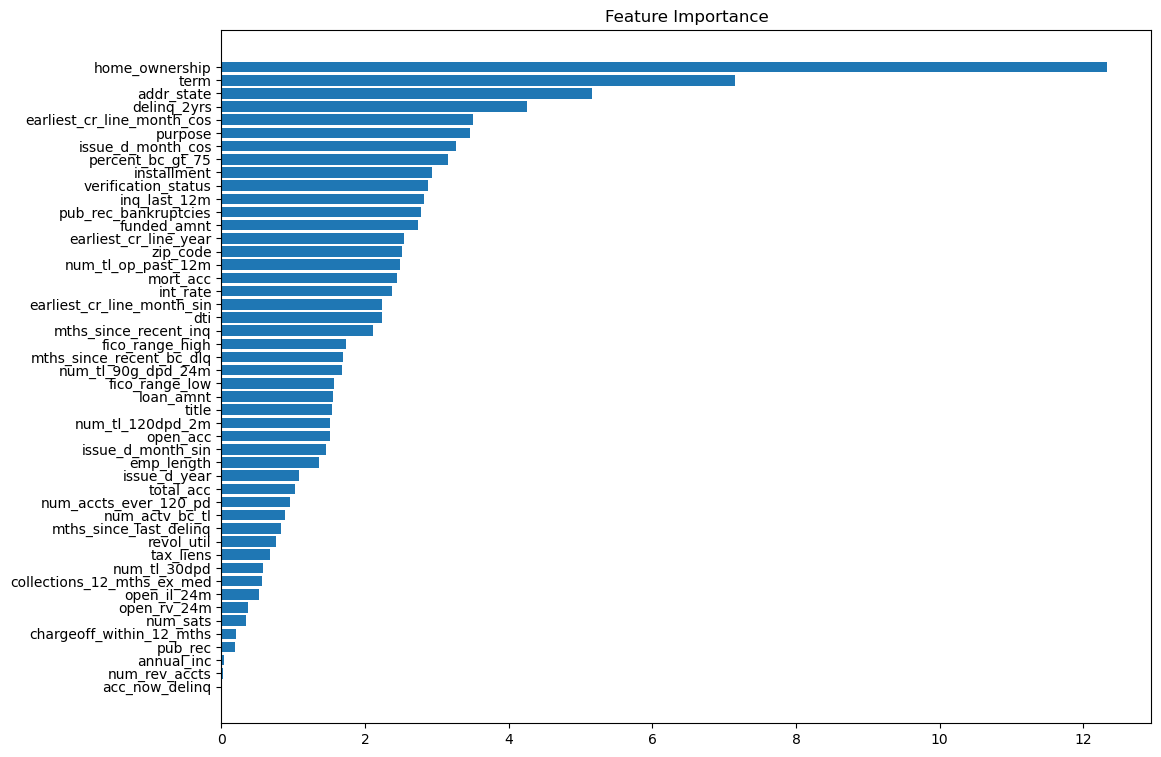

In [135]:
feature_importance = cbc_1.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 9))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_train_cols.columns)[sorted_idx])
plt.title('Feature Importance')

Get X_test subm

In [69]:
X_test_preprocess = preprocessor.transform(X_test)

[IterativeImputer] Completing matrix with shape (590977, 40)
[IterativeImputer] Ending imputation round 1/10, elapsed time 1.68
[IterativeImputer] Ending imputation round 2/10, elapsed time 3.19
[IterativeImputer] Ending imputation round 3/10, elapsed time 4.72
[IterativeImputer] Ending imputation round 4/10, elapsed time 6.22
[IterativeImputer] Ending imputation round 5/10, elapsed time 7.73
[IterativeImputer] Ending imputation round 6/10, elapsed time 9.24
[IterativeImputer] Ending imputation round 7/10, elapsed time 10.74
[IterativeImputer] Ending imputation round 8/10, elapsed time 12.24
[IterativeImputer] Ending imputation round 9/10, elapsed time 13.72
[IterativeImputer] Ending imputation round 10/10, elapsed time 15.21


In [106]:
test_pred = cbc_1.predict(X_test_preprocess)

In [107]:
submit = pd.read_csv('data/answer.csv')
submit['loan_status'] = test_pred

In [108]:
submit.loan_status.value_counts()/submit.loan_status.shape[0]

0    0.604477
1    0.395523
Name: loan_status, dtype: float64

In [109]:
y_train.loan_status.value_counts()/y_train.loan_status.shape[0]

0    0.806971
1    0.193029
Name: loan_status, dtype: float64

In [110]:
submit.to_csv('answer.csv')

In [111]:
import zipfile
      
jungle_zip = zipfile.ZipFile('answer.zip', 'w')
jungle_zip.write('answer.csv', compress_type=zipfile.ZIP_DEFLATED)
jungle_zip.close()